In [1]:

# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# For Jupyter Notebook plotting
%matplotlib inline


In [2]:
Hosp_d=pd.read_csv('Hospitalisation details.csv')
Med_d=pd.read_csv('Medical Examinations.csv')
name_d=pd.read_excel('Names.xlsx')

In [3]:
print("Hospital_Data")
print(Hosp_d.head(3))
print("Medical_Data")
print(Med_d.head(3))
print("Name_Data")
print(name_d.head(3))

Hospital_Data
  Customer ID  year month  date  children  charges Hospital tier City tier  \
0      Id2335  1992   Jul     9         0   563.84      tier - 2  tier - 3   
1      Id2334  1992   Nov    30         0   570.62      tier - 2  tier - 1   
2      Id2333  1993   Jun    30         0   600.00      tier - 2  tier - 1   

  State ID  
0    R1013  
1    R1013  
2    R1013  
Medical_Data
  Customer ID     BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0         Id1  47.410   7.47           No              No             No   
1         Id2  30.360   5.77           No              No             No   
2         Id3  34.485  11.87          yes              No             No   

  NumberOfMajorSurgeries smoker  
0       No major surgery    yes  
1       No major surgery    yes  
2                      2    yes  
Name_Data
  Customer ID                    name
0         Id1       Hawks, Ms.  Kelly
1         Id2  Lehner, Mr.  Matthew D
2         Id3           Lu, Mr.  Phil


In [4]:
Hosp_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2343 non-null   object 
 1   year           2343 non-null   object 
 2   month          2343 non-null   object 
 3   date           2343 non-null   int64  
 4   children       2343 non-null   int64  
 5   charges        2343 non-null   float64
 6   Hospital tier  2343 non-null   object 
 7   City tier      2343 non-null   object 
 8   State ID       2343 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 164.9+ KB


In [5]:
Med_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   BMI                     2335 non-null   float64
 2   HBA1C                   2335 non-null   float64
 3   Heart Issues            2335 non-null   object 
 4   Any Transplants         2335 non-null   object 
 5   Cancer history          2335 non-null   object 
 6   NumberOfMajorSurgeries  2335 non-null   object 
 7   smoker                  2335 non-null   object 
dtypes: float64(2), object(6)
memory usage: 146.1+ KB


In [6]:
name_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  2335 non-null   object
 1   name         2335 non-null   object
dtypes: object(2)
memory usage: 36.6+ KB


In [7]:
Name_Hosp_d=pd.merge(name_d, Hosp_d,on='Customer ID')
Name_Hosp_d.head(2)

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013


In [8]:
df=pd.merge(Name_Hosp_d, Med_d,on='Customer ID')
df.head()

,Customer ID,name,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,"Lu, Mr. Phil",1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes
3,Id4,"Osborne, Ms. Kelsey",1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,"Kadala, Ms. Kristyn",1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes


In [9]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Customer_ID', 'name', 'year', 'month', 'date', 'children', 'charges',
       'Hospital_tier', 'City_tier', 'State_ID', 'BMI', 'HBA1C',
       'Heart_Issues', 'Any_Transplants', 'Cancer_history',
       'NumberOfMajorSurgeries', 'smoker'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             2335 non-null   object 
 1   name                    2335 non-null   object 
 2   year                    2335 non-null   object 
 3   month                   2335 non-null   object 
 4   date                    2335 non-null   int64  
 5   children                2335 non-null   int64  
 6   charges                 2335 non-null   float64
 7   Hospital_tier           2335 non-null   object 
 8   City_tier               2335 non-null   object 
 9   State_ID                2335 non-null   object 
 10  BMI                     2335 non-null   float64
 11  HBA1C                   2335 non-null   float64
 12  Heart_Issues            2335 non-null   object 
 13  Any_Transplants         2335 non-null   object 
 14  Cancer_history          2335 non-null   

In [11]:
(df == '?').sum()

,0
Customer_ID,0
name,0
year,2
month,3
date,0
children,0
charges,0
Hospital_tier,1
City_tier,1
State_ID,2


**3. Find the percentage of rows that have trivial value (for example, ?), and delete such rows if they do not contain significant information**

In [12]:
Missing_Value=len(df[df.eq('?').any(axis=1)])/len(df)*100
print("Missing_Value :  ",round(Missing_Value,4),"%")
print("That means",round(100-Missing_Value,4), "% data is OK" )

Missing_Value :   0.4283 %
That means 99.5717 % data is OK


# **Data Details & Handling**

# **4. Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset**

In [13]:
df = df.replace("?", np.nan)
df = df.dropna()
df

,Customer_ID,name,year,month,date,children,charges,Hospital_tier,City_tier,State_ID,BMI,HBA1C,Heart_Issues,Any_Transplants,Cancer_history,NumberOfMajorSurgeries,smoker
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes
3,Id4,"Osborne, Ms. Kelsey",1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,"Kadala, Ms. Kristyn",1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes
5,Id6,"Baker, Mr. Russell B.",1962,Aug,4,0,52590.83,tier - 1,tier - 3,R1011,32.800,6.59,No,No,No,No major surgery,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id2331,"Brietzke, Mr. Jordan",1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.340,5.57,No,No,No,1,No
2331,Id2332,"Riveros Gonzalez, Mr. Juan D. Sr.",1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.700,6.28,No,No,No,1,No
2332,Id2333,"Albano, Ms. Julie",1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.470,6.35,No,No,Yes,1,No
2333,Id2334,"Rosendahl, Mr. Evan P",1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.600,4.39,No,No,No,1,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             2325 non-null   object 
 1   name                    2325 non-null   object 
 2   year                    2325 non-null   object 
 3   month                   2325 non-null   object 
 4   date                    2325 non-null   int64  
 5   children                2325 non-null   int64  
 6   charges                 2325 non-null   float64
 7   Hospital_tier           2325 non-null   object 
 8   City_tier               2325 non-null   object 
 9   State_ID                2325 non-null   object 
 10  BMI                     2325 non-null   float64
 11  HBA1C                   2325 non-null   float64
 12  Heart_Issues            2325 non-null   object 
 13  Any_Transplants         2325 non-null   object 
 14  Cancer_history          2325 non-null   objec

In [15]:
(df == '?').sum()

,0
Customer_ID,0
name,0
year,0
month,0
date,0
children,0
charges,0
Hospital_tier,0
City_tier,0
State_ID,0


5. The dataset has State ID, which has around 16 states. All states are not represented in equal
proportions in the data. Creating dummy variables for all regions may also result in too many
insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating
further. Design a suitable strategy to create dummy variables with these restraints.

In [16]:
df[['City_tier', 'Hospital_tier']]

,City_tier,Hospital_tier
0,tier - 3,tier - 1
1,tier - 3,tier - 2
3,tier - 3,tier - 1
4,tier - 2,tier - 1
5,tier - 3,tier - 1
...,...,...
2330,tier - 3,tier - 3
2331,tier - 3,tier - 3
2332,tier - 1,tier - 2
2333,tier - 1,tier - 2


In [17]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder(
    categories=[['tier - 3', 'tier - 2', 'tier - 1'],
                ['tier - 3', 'tier - 2', 'tier - 1']]
)

df[['City_tier_ord','Hospital_tier_ord']] = ordinal.fit_transform(
   df[['City_tier', 'Hospital_tier']]
)


In [18]:
pd.crosstab(df['City_tier_ord'],df['City_tier'])

City_tier,tier - 1,tier - 2,tier - 3
City_tier_ord,,,
0.0,0,0,789
1.0,0,807,0
2.0,729,0,0


In [19]:
pd.crosstab(df['Hospital_tier_ord'],df['Hospital_tier'])

Hospital_tier,tier - 1,tier - 2,tier - 3
Hospital_tier_ord,,,
0.0,0,0,691
1.0,0,1334,0
2.0,300,0,0


In [20]:
df.head(3
      )

,Customer_ID,name,year,month,date,children,charges,Hospital_tier,City_tier,State_ID,BMI,HBA1C,Heart_Issues,Any_Transplants,Cancer_history,NumberOfMajorSurgeries,smoker,City_tier_ord,Hospital_tier_ord
0,Id1,"Hawks, Ms. Kelly",1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.410,7.47,No,No,No,No major surgery,yes,0.0,2.0
1,Id2,"Lehner, Mr. Matthew D",1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes,0.0,1.0
3,Id4,"Osborne, Ms. Kelsey",1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes,0.0,2.0


In [21]:
df.shape

(2325, 19)

In [22]:
vc= df.State_ID.value_counts()
vc[:3].index

Index(['R1013', 'R1011', 'R1012'], dtype='object', name='State_ID')

In [23]:
for i in vc[:3].index:
    var_name = 'State_ID_' +i   # create name for the dummy varible
    print(var_name)
    df[var_name] = 0    # giving a dummy value 0 to dummy variable
    df.loc[df.State_ID == i,var_name] = 1  # replacing 0 by 1 where state id is equal to category of the dummy variable

State_ID_R1013
State_ID_R1011
State_ID_R1012


In [24]:
df.State_ID.value_counts()

,count
State_ID,
R1013,609
R1011,574
R1012,572
R1024,159
R1026,84
R1021,70
R1016,64
R1025,40
R1023,38


Corresponding value of Top 3

In [25]:
print(df['State_ID_R1013'].value_counts())
print(df['State_ID_R1011'].value_counts())
print(df['State_ID_R1012'].value_counts())

State_ID_R1013
0    1716
1     609
Name: count, dtype: int64
State_ID_R1011
0    1751
1     574
Name: count, dtype: int64
State_ID_R1012
0    1753
1     572
Name: count, dtype: int64


## **6. The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable method to clean up this variable**

In [26]:
df.NumberOfMajorSurgeries.unique()

array(['No major surgery', '3', '1', '2'], dtype=object)

In [27]:
df.loc[df.NumberOfMajorSurgeries=='No major surgery', 'NumberOfMajorSurgeries'] = 0

In [28]:
df.NumberOfMajorSurgeries=df.NumberOfMajorSurgeries.astype(int)

In [29]:
df.NumberOfMajorSurgeries.unique()

array([0, 3, 1, 2])

### **7. Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth.**


In [30]:
df.year=df.year.astype(int)

In [31]:
df['Age']=2025-df.year

##**8. The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.**

In [32]:
df['Gender'] = df['name'].apply(
    lambda x: 'Male' if 'Mr.' in x
    else ('Female' if 'Ms.' in x or 'Mrs.' in x else 'Unknown')
)


In [33]:
df.Gender.value_counts()

,count
Gender,
Female,1165
Male,1160


**9. You should also visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.**

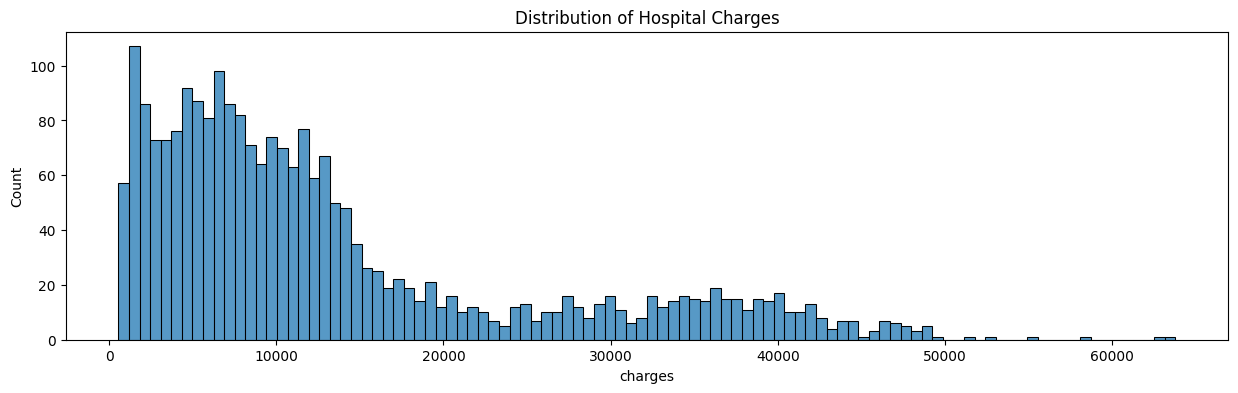

In [34]:
plt.figure(figsize = (15,4))
plt.title("Distribution of Hospital Charges")
sns.histplot(df['charges'], bins=100)
plt.show()

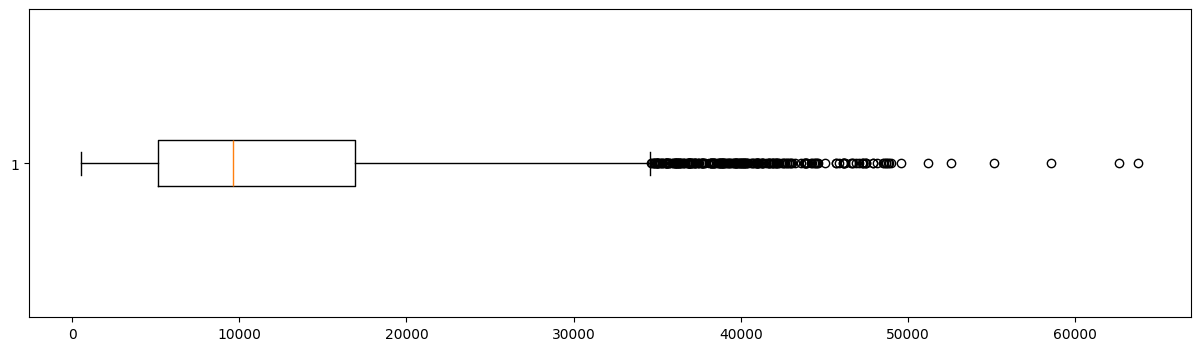

In [35]:
plt.figure(figsize = (15,4))
plt.boxplot(df.charges, vert = False)
plt.show()

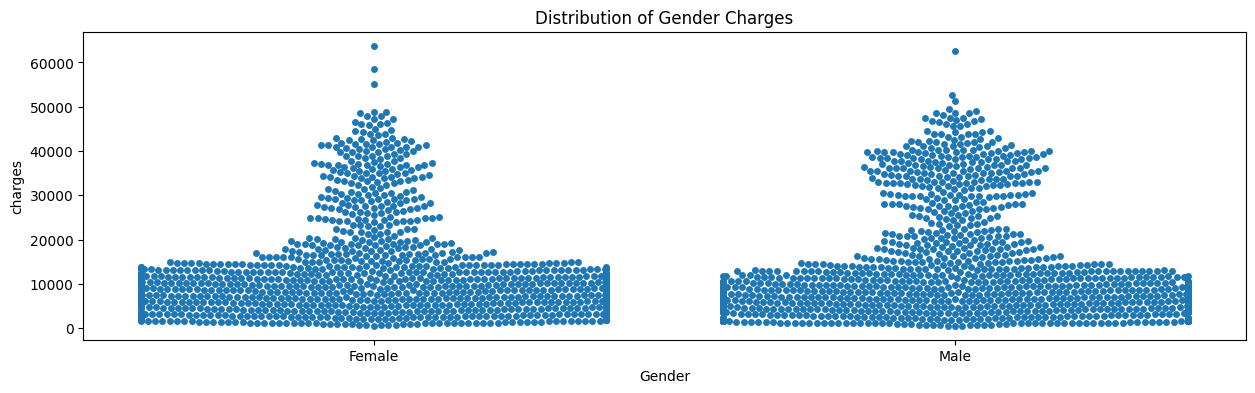

In [36]:
# plt.subplot(grid[1, :])   # bottom row of the grid

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
plt.figure(figsize = (15,4))
plt.title("Distribution of Gender Charges")
sns.swarmplot(x="Gender", y="charges", data=df)
plt.show()

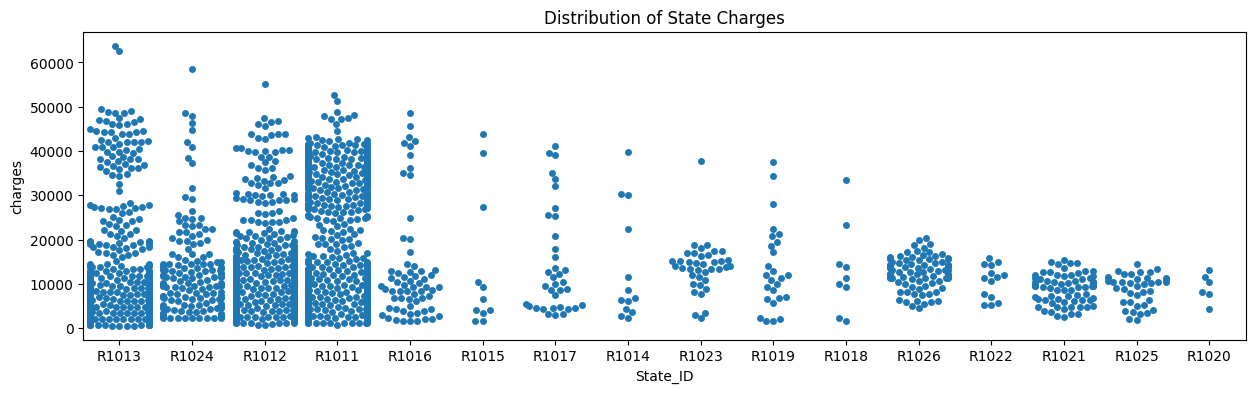

In [37]:
plt.figure(figsize = (15,4))
plt.title("Distribution of State Charges")
sns.swarmplot(x="State_ID", y="charges", data=df)
plt.show()

## **10. State how the distribution is different across gender and tiers of hospitals**

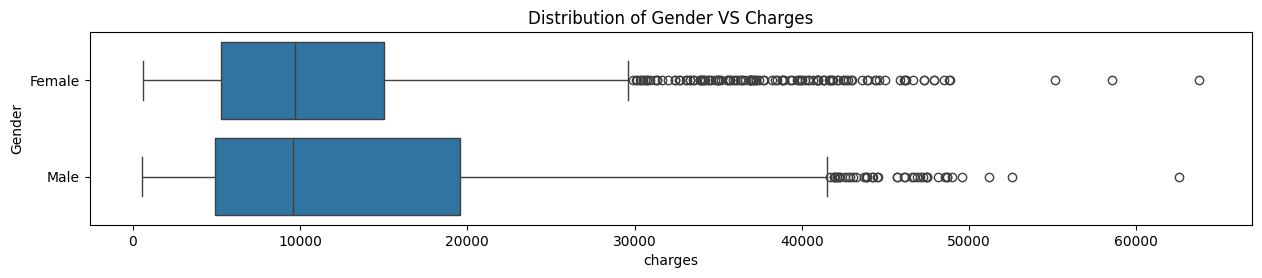

In [38]:
plt.figure(figsize = (15,2.5))
plt.title("Distribution of Gender VS Charges")
sns.boxplot(x = "charges",y = "Gender", data = df)
plt.show()

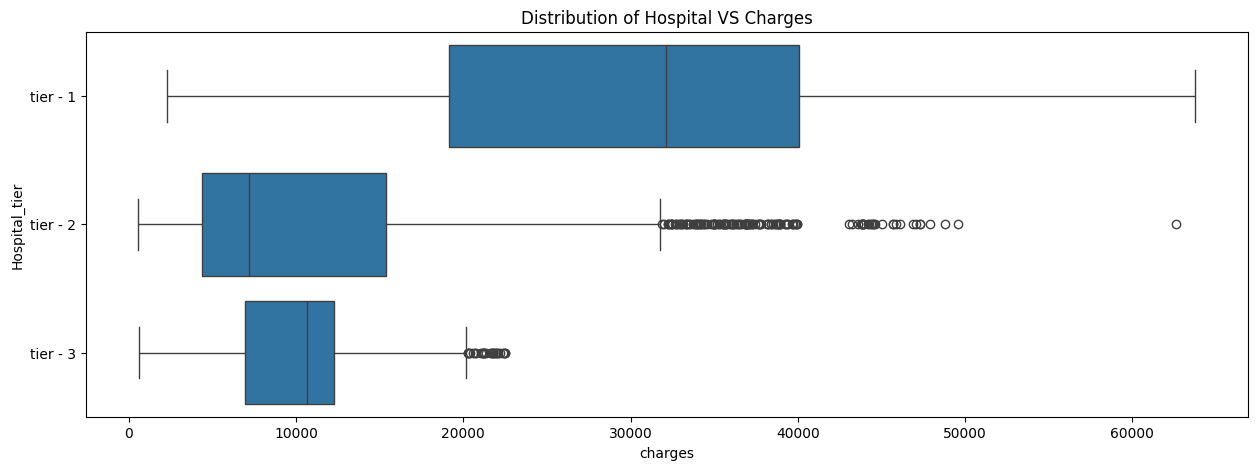

In [39]:
plt.figure(figsize = (15,5))
plt.title("Distribution of Hospital VS Charges")
sns.boxplot(x = "charges",y = "Hospital_tier", data = df)
plt.show()

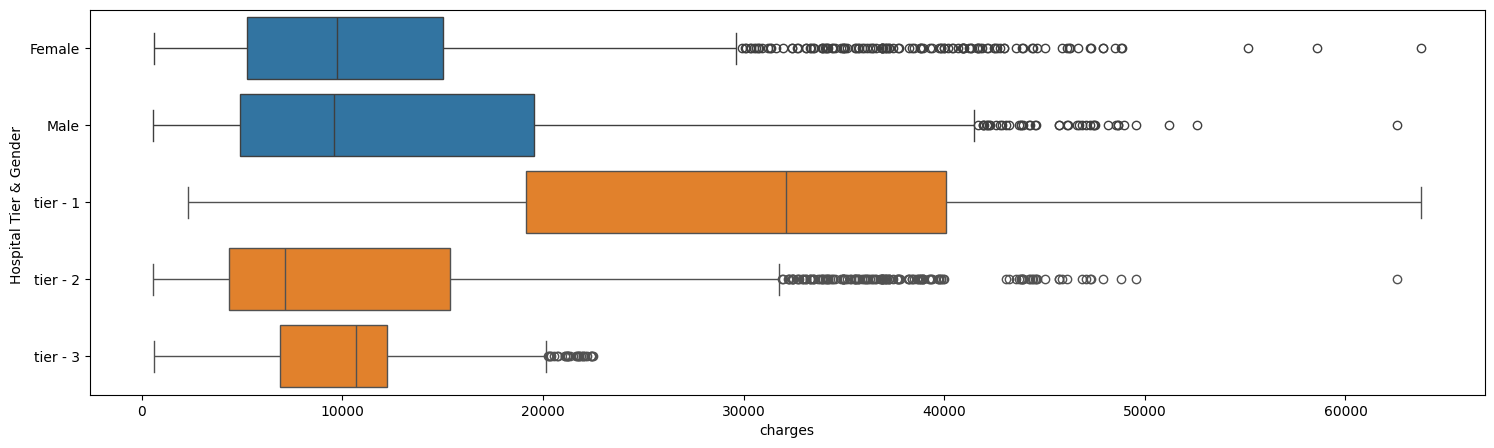

In [40]:
plt.figure(figsize = (18,5))
sns.boxplot(y="Gender", x="charges", data=df)
sns.boxplot(y="Hospital_tier", x="charges", data=df)
# plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.ylabel("Hospital Tier & Gender ")
plt.show()

## **11. Create a radar chart to showcase the median hospitalization cost for each tier of hospitals**

In [41]:
import plotly.express as px
median = df.groupby('Hospital_tier')[['charges']].median().reset_index()

In [42]:

fig = px.line_polar(median, r='charges', theta='Hospital_tier', line_close=True)
fig.update_layout(width=500, height=500, title="Median Charges by Hospital Tier")
fig.show()

### **12. Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals**

Hospital_tier  tier - 1  tier - 2  tier - 3
City_tier                                  
tier - 1             85       403       241
tier - 2            106       479       222
tier - 3            109       452       228


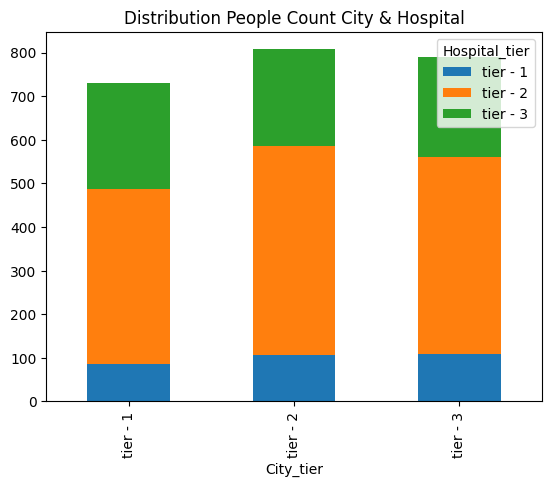

In [43]:
freq_table = pd.crosstab(df['City_tier'], df['Hospital_tier'])
print(freq_table)


freq_table.plot(kind="bar", stacked=True)
plt.title("Distribution People Count City & Hospital")
plt.show()


# **13. Test the following null hypotheses:**

**a. The average hospitalization costs for the three types of hospitals are not significantly different.**

**b. The average hospitalization costs for the three types of cities are not significantly different.**

**c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.**

**d. Smoking and heart issues are independent**

### **13(a) The average hospitalization costs for the three types of hospitals are not significantly different.**

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('charges ~  Hospital_tier', data = df).fit()
res = sm.stats.anova_lm(mod)
res

,df,sum_sq,mean_sq,F,PR(>F)
Hospital_tier,2.0,9.763011e+10,4.881505e+10,493.989566,1.773822e-179
Residual,2322.0,2.294554e+11,9.881799e+07,NaN,NaN


## **13(b). The average hospitalization costs for the three types of cities are not significantly different.**

In [45]:
mod = ols('charges ~  City_tier', data = df).fit()
res = sm.stats.anova_lm(mod)
res

,df,sum_sq,mean_sq,F,PR(>F)
City_tier,2.0,4.092192e+08,2.046096e+08,1.454356,0.233763
Residual,2322.0,3.266763e+11,1.406874e+08,NaN,NaN


### **13(c). The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.**

In [46]:
sample1 = df.loc[df.smoker == 'yes', 'charges']
sample2 = df.loc[df.smoker != 'yes', 'charges']
stats.ttest_ind(sample1, sample2)

TtestResult(statistic=np.float64(74.15560699695726), pvalue=np.float64(0.0), df=np.float64(2323.0))

## **13(d). Smoking and heart issues are independent.**

In [47]:
# observed_table = pd.crosstab(df.smoker, df. Heart_Issues)
# observed_table

In [48]:
# chi, p, df, expected = stats.chi2_contingency(observed_table)
# chi, p, df, expected

## **14. Examine the correlation between predictors to identify highly correlated predictors Hint: Use a heatmap to visualize this**

In [49]:
df.columns

Index(['Customer_ID', 'name', 'year', 'month', 'date', 'children', 'charges',
       'Hospital_tier', 'City_tier', 'State_ID', 'BMI', 'HBA1C',
       'Heart_Issues', 'Any_Transplants', 'Cancer_history',
       'NumberOfMajorSurgeries', 'smoker', 'City_tier_ord',
       'Hospital_tier_ord', 'State_ID_R1013', 'State_ID_R1011',
       'State_ID_R1012', 'Age', 'Gender'],
      dtype='object')

In [50]:
data = df.drop(columns = ['Customer_ID','name', 'year', 'month', 'date','Hospital_tier',
       'City_tier', 'State_ID' , 'Gender'])

In [51]:
corr_plot = data.select_dtypes(exclude='object').corr()
ma = np.ones_like(corr_plot)
ma[np.tril_indices_from(ma)] = 0

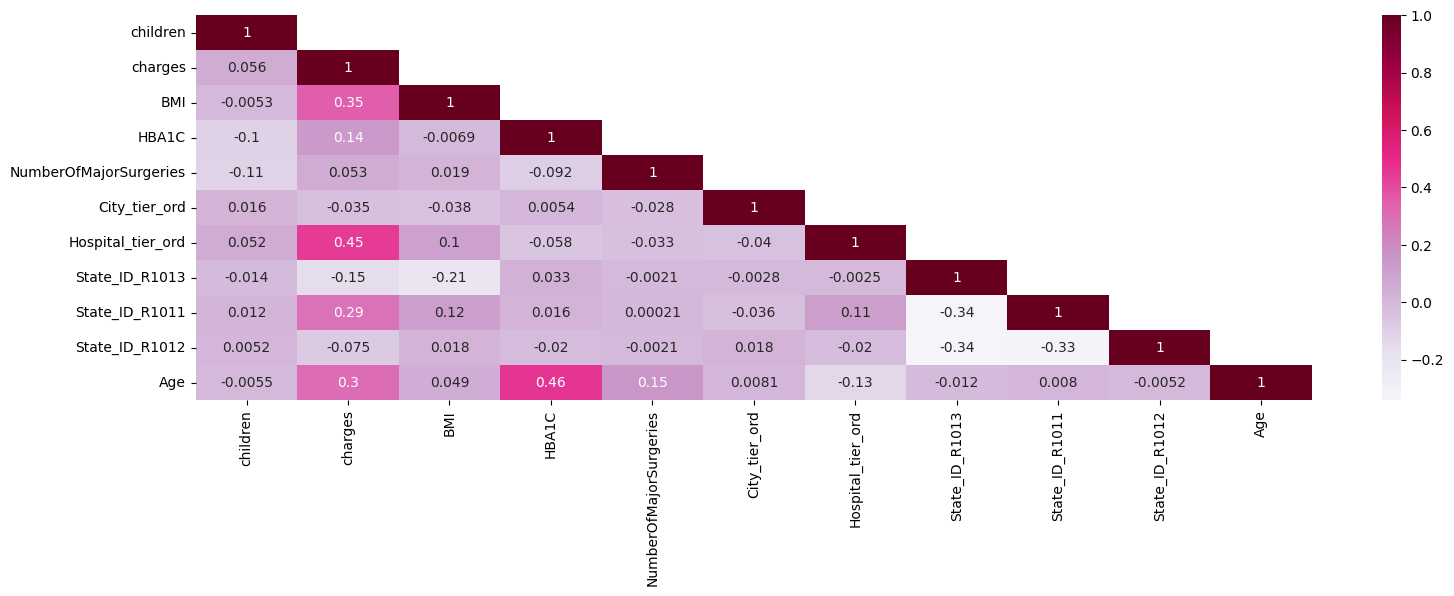

In [52]:
plt.figure(figsize = (18,5))
sns.heatmap(corr_plot, annot= True , mask = ma, cmap='PuRd')
plt.show()

15. Develop a regression model Linear or Ridge. Evaluate the model with k-fold cross validation.
Also, ensure that you apply all the following suggestions:

• Implement the stratified 5-fold cross validation technique for both model building and validation

• Utilize effective standardization techniques and hyperparameter tuning

• Incorporate sklearn-pipelines to streamline the workflow

• Apply appropriate regularization techniques to address the bias-variance trade-off

• Create five folds in the data, and introduce a variable to identify the folds

• Develop Gradient Boost model and determine the variable importance scores, and identify the redundant variables


In [53]:
data_2 = pd.get_dummies(data, drop_first=True)
data_2.reset_index(drop=True, inplace = True)

In [54]:
data_2.head()

,children,charges,BMI,HBA1C,NumberOfMajorSurgeries,City_tier_ord,Hospital_tier_ord,State_ID_R1013,State_ID_R1011,State_ID_R1012,Age,Heart_Issues_yes,Any_Transplants_yes,Cancer_history_Yes,smoker_yes
0,0,63770.43,47.410,7.47,0,0.0,2.0,1,0,0,57,False,False,False,True
1,0,62592.87,30.360,5.77,0,0.0,1.0,1,0,0,48,False,False,False,True
2,1,58571.07,38.095,6.05,0,0.0,2.0,0,0,0,34,False,False,False,True
3,0,55135.40,35.530,5.45,0,1.0,2.0,0,0,1,36,False,False,False,True
4,0,52590.83,32.800,6.59,0,0.0,2.0,0,1,0,63,False,False,False,True


In [55]:
# rearrange data to put 'charges' as first column or last
model_data = data_2.drop(columns = 'charges')
model_data.head()
model_data['charges'] = data_2.charges
model_data.head()

,children,BMI,HBA1C,NumberOfMajorSurgeries,City_tier_ord,Hospital_tier_ord,State_ID_R1013,State_ID_R1011,State_ID_R1012,Age,Heart_Issues_yes,Any_Transplants_yes,Cancer_history_Yes,smoker_yes,charges
0,0,47.410,7.47,0,0.0,2.0,1,0,0,57,False,False,False,True,63770.43
1,0,30.360,5.77,0,0.0,1.0,1,0,0,48,False,False,False,True,62592.87
2,1,38.095,6.05,0,0.0,2.0,0,0,0,34,False,False,False,True,58571.07
3,0,35.530,5.45,0,1.0,2.0,0,0,1,36,False,False,False,True,55135.40
4,0,32.800,6.59,0,0.0,2.0,0,1,0,63,False,False,False,True,52590.83


In [56]:
model_data.columns = model_data.columns.str.lower()

In [57]:
model_data.columns

Index(['children', 'bmi', 'hba1c', 'numberofmajorsurgeries', 'city_tier_ord',
       'hospital_tier_ord', 'state_id_r1013', 'state_id_r1011',
       'state_id_r1012', 'age', 'heart_issues_yes', 'any_transplants_yes',
       'cancer_history_yes', 'smoker_yes', 'charges'],
      dtype='object')

In [58]:
# converting y to categorical for stratified k fold
y = model_data['charges']
X = model_data.drop(columns = 'charges')

In [59]:
X.head()

,children,bmi,hba1c,numberofmajorsurgeries,city_tier_ord,hospital_tier_ord,state_id_r1013,state_id_r1011,state_id_r1012,age,heart_issues_yes,any_transplants_yes,cancer_history_yes,smoker_yes
0,0,47.410,7.47,0,0.0,2.0,1,0,0,57,False,False,False,True
1,0,30.360,5.77,0,0.0,1.0,1,0,0,48,False,False,False,True
2,1,38.095,6.05,0,0.0,2.0,0,0,0,34,False,False,False,True
3,0,35.530,5.45,0,1.0,2.0,0,0,1,36,False,False,False,True
4,0,32.800,6.59,0,0.0,2.0,0,1,0,63,False,False,False,True


In [60]:
#Setting up a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('regressor', Ridge())])

In [61]:
# Defining the parameters for hyperparameter tuning
parameters = {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [62]:
# Creating the KFold object
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [63]:
# Creating the grid search object
model_ridge = GridSearchCV(pipeline, parameters, cv=kfold, scoring='neg_mean_squared_error')

In [64]:
model_ridge.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [65]:
# Getting the best parameters and the best model
model_ridge.best_params_

{'regressor__alpha': 0.001}

In [66]:
model_ridge.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', Ridge(alpha=0.001))])

**Gradient Boosting Algorithm**

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
# Assuming df is your DataFrame
# Use df appropriately to prepare X (input) and y (output)

# Split the data into training and testing sets
# (Make sure to replace X and y with your data appropriately)
X_train,X_test,y_train,y_test = train_test_split(X,y)
# Train the XGBoost model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)


# You can print the feature importances if needed
print(model.feature_importances_)

# Identify redundant variables based on the importance scores

[5.55545958e-03 1.09770959e-01 4.65678417e-03 6.28224106e-05
 2.35589751e-04 2.11235251e-02 3.98896963e-03 9.05979573e-03
 3.22012441e-04 9.67893653e-02 2.09782713e-04 0.00000000e+00
 3.31715762e-05 7.48191762e-01]


In [69]:
pd.DataFrame({'Features':model.feature_names_in_,'Importance':model.feature_importances_}).sort_values("Importance",ascending=False)

,Features,Importance
13,smoker_yes,0.748192
1,bmi,0.109771
9,age,0.096789
5,hospital_tier_ord,0.021124
7,state_id_r1011,0.009060
0,children,0.005555
2,hba1c,0.004657
6,state_id_r1013,0.003989
8,state_id_r1012,0.000322
4,city_tier_ord,0.000236


In [70]:
# train score
model.score(X_train,y_train)

0.9369374019807202

In [71]:
# test score
model.score(X_test,y_test)

0.906816915717256

### **16. Case scenario: Estimate the cost of hospitalization for Christopher, Ms. Jayna (Date of birth 12/28/1988; height 170 cm; and weight 85 kgs). She lives with her partner and two children in a tier-1 city, and her state’s State ID is R1011. She was found to be nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be estimated using tier-1 hospitals.**

In [72]:
model_data.columns

Index(['children', 'bmi', 'hba1c', 'numberofmajorsurgeries', 'city_tier_ord',
       'hospital_tier_ord', 'state_id_r1013', 'state_id_r1011',
       'state_id_r1012', 'age', 'heart_issues_yes', 'any_transplants_yes',
       'cancer_history_yes', 'smoker_yes', 'charges'],
      dtype='object')

In [73]:
pred_data = pd.DataFrame({'Name' : ['Christopher, Ms. Jayna'],
                      'DOB' : ['12/28/1988'],
                      'City_tier' : ['tier - 1'], 'children' :[ 2],
                       'HbA1c' : [5.8],
                       'smoker_yes' : [1],
                       'heart_issues_yes' : [0],
                       'any_transplants_yes' : [0],
                       'numberofmajorsurgeries' :[ 0],
                       'cancer_history_yes' : [1],
                       'Hospital_tier' : ['tier - 1'],
                       'bmi' : [85/(1.70 **2)],
                       'state_id_R1011' : [1]
                      })

In [74]:
pred_data

,Name,DOB,City_tier,children,HbA1c,smoker_yes,heart_issues_yes,any_transplants_yes,numberofmajorsurgeries,cancer_history_yes,Hospital_tier,bmi,state_id_R1011
0,"Christopher, Ms. Jayna",12/28/1988,tier - 1,2,5.8,1,0,0,0,1,tier - 1,29.411765,1


In [75]:
pred_data.columns = pred_data.columns.str.lower()

In [76]:
pred_data['gender_male']  = 0
pred_data.loc[pred_data.name.str.split('[,.]').str[1] == 'Mr', 'gender_male'] = 1
pred_data.drop(columns = 'name', inplace = True)

In [77]:
pred_data

,dob,city_tier,children,hba1c,smoker_yes,heart_issues_yes,any_transplants_yes,numberofmajorsurgeries,cancer_history_yes,hospital_tier,bmi,state_id_r1011,gender_male
0,12/28/1988,tier - 1,2,5.8,1,0,0,0,1,tier - 1,29.411765,1,0


In [78]:
# pred_data['Age'] =2023 - pred_data.dob.astype(np.datetime64).dt.year
pred_data['Age'] = 2023 - pd.to_datetime(pred_data['dob']).dt.year


In [79]:
pred_data.drop(columns = 'dob', inplace = True)

In [80]:
pred_data.rename(columns={
    'city_tier': 'City_tier',
    'hospital_tier': 'Hospital_tier'
}, inplace=True)

pred_data[['city_tier_ord', 'hospital_tier_ord']] = ordinal.transform(pred_data[['City_tier', 'Hospital_tier']])


In [82]:
pred_data.drop(columns =['City_tier', 'Hospital_tier'], inplace = True )

In [83]:
for col in model_data.columns:
    if col not in pred_data.columns and col != 'charges':
        pred_data[col] = 0

In [84]:
pred_data

,children,hba1c,smoker_yes,heart_issues_yes,any_transplants_yes,numberofmajorsurgeries,cancer_history_yes,bmi,state_id_r1011,gender_male,Age,city_tier_ord,hospital_tier_ord,state_id_r1013,state_id_r1012,age
0,2,5.8,1,0,0,0,1,29.411765,1,0,35,2.0,2.0,0,0,0


In [85]:
### Apply Gradient BOOST model for predi
model_data.columns

Index(['children', 'bmi', 'hba1c', 'numberofmajorsurgeries', 'city_tier_ord',
       'hospital_tier_ord', 'state_id_r1013', 'state_id_r1011',
       'state_id_r1012', 'age', 'heart_issues_yes', 'any_transplants_yes',
       'cancer_history_yes', 'smoker_yes', 'charges'],
      dtype='object')

In [86]:
pred_data.columns

Index(['children', 'hba1c', 'smoker_yes', 'heart_issues_yes',
       'any_transplants_yes', 'numberofmajorsurgeries', 'cancer_history_yes',
       'bmi', 'state_id_r1011', 'gender_male', 'Age', 'city_tier_ord',
       'hospital_tier_ord', 'state_id_r1013', 'state_id_r1012', 'age'],
      dtype='object')

In [87]:
pred_data=pred_data[model_data.drop(columns='charges').columns]

In [88]:
model.predict(pred_data)

array([22698.61877701])